- 왼쪽에 있는 목차 보시면 더 편하게 보실 수 있습니다

# I. 당신의 생일로부터 거슬러 올라가는 100여년의 역사
- 생일을 입력하면 온도, 강수량과 관련된 날짜 및 값을 출력하고 그래프를 그려준다

In [ ]:
# 한글 설치
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'NanumGothic')

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## **1. 가장 더웠던/추웠던 날+기온, 그래프**
- 사용한 파일 https://drive.google.com/file/d/1Yr5p0Jsvhhth2ZAxD3z1Ske-k-a8Piw-/view?usp=sharing
- 계산을 통해서 나오는 고정된 값이 있다면 그 값을 for 등의 반복문 위에 써두자
- 그렇지 않으면 반복할 때마다 계산을 해야 한다. ex) M = max(high_y)

In [ ]:
# 초기 설정
import csv
import datetime as dt
import matplotlib.pyplot as plt
data = csv.reader(open('seoultemp.csv', encoding = 'cp949'))
next(data)
print('1907년부터 현재까지 당신의 생일날의 기온변화를 알아봅시다.')

# 리스트 만들기
high_x = []       
high_date = []
high_y = []
low_x = []
low_date = []
low_y = []

# 생일 입력
while True:
  bday = input('당신의 생일을 입력해주세요 [예: 07-05] : ')
  try:                                                  # 날짜 제대로 입력했나 확인:
    dt.datetime.strptime(bday, "%m-%d")                 # str인 값을 datetime으로 변경
  except ValueError:                                    # 날짜 형태가 틀리면
    print('00-00 형태로 다시 입력해주세요')             # 오류 메시지 출력 후
    continue                                            # 다시 input으로 돌아감
  else:
    break

# 리스트 구성
for row in data :
  if row[-1] != '' :
    if '-' + bday in row[0] :                            # 생일 날짜만 골라서
      high_x.append(int(row[0][0:4]))                    # 년도
      high_date.append(row[0])                           # 연,월,일
      high_y.append(float(row[-1]))                      # 최고기온 리스트 구성
  if row[-2] != '' :
    if '-' + bday in row[0] :
      low_x.append(int(row[0][0:4]))                    
      low_date.append(row[0])                           
      low_y.append(float(row[-2]))                       # 최저기온 리스트 구성

# 가장 더웠던 날과 그때의 온도 출력
M = max(high_y)
for i in range(len(high_x)) :
  if high_y[i] == M :                                    # 최고온도일 때 날짜 찾기 위해
    d = dt.datetime.strptime(high_date[i], '%Y-%m-%d')   # str인 값을 datetime으로 변경
print('\n┌───────────────────────────────────────┐')
print(f'   당신의 생일 중 가장 더웠던 날은 {d.year}년 {d.month}월 {d.day}일이고, 기온은 {M}℃ 였습니다.')
print('│                                                                              │')

# 가장 추웠던 날과 그때의 온도 출력
m = min(low_y)
for i in range(len(low_x)) :
  if low_y[i] == m :                                     # 최저온도일 때 날짜 찾기 위해  
    d = dt.datetime.strptime(low_date[i], '%Y-%m-%d')   
print(f'   당신의 생일 중 가장 추웠던 날은 {d.year}년 {d.month}월 {d.day}일이고, 기온은 {m}℃ 였습니다.')
print('└───────────────────────────────────────┘')

# 최고기온, 최저기온 그래프 출력
print('\n다음은 1907년부터 현재까지 당신의 생일날의 기온변화를 보여주는 그래프입니다')
plt.title('생일날의 최고기온과 최저기온')
plt.ylabel('온도(℃)')
plt.xlabel('년도')
plt.plot(high_x, high_y, c = 'r', label = '최고기온')
plt.legend()
plt.plot(low_x, low_y, c = 'b', label = '최저기온')
plt.legend()
plt.show()

1907년부터 현재까지 당신의 생일날의 기온변화를 알아봅시다.
당신의 생일을 입력해주세요 [예: 07-05] : 07-05
[1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


- 날짜의 형태를 바꾸는 방법을 알고 싶다
  (12-28 을 12월 28일로 바꾸는 것, 그 반대도)
  1. 질문방에서 strftime과 strptime 라는 답변을 얻었다
  2. date 자체에 대한 공부가 좀 필요할 것 같다
- csv 파일은 txt 파일이랑 다르게 검색 후 커서를 초기화할 필요가 없는 것 같다

## **2. 비나 눈이 가장 많이 왔던 날+강수량/오지 않은 해, 그래프**
- 사용한 파일 https://drive.google.com/file/d/1GMw6L2mGS6yesmgAb5bjB7oCXJybvl7X/view?usp=sharing

1907년부터 현재까지 당신의 생일날의 강수량 변화를 알아봅시다.
당신의 생일을 입력해주세요. [예: 02-08] : 02-08

당신의 생일 중 비나 눈이 가장 많이 왔던 날은 1964년 2월 8일이고, 강수량은 8.2mm였습니다
[1909, 1910, 1914, 1933, 1940, 1943, 1960, 1963, 1971, 1977, 1979, 1990, 2002, 2005, 2008, 2010, 2020]년 당신의 생일날엔 비가 오지 않았습니다

다음은 1907년부터 현재까지 당신의 생일날의 강수량 변화를 보여주는 그래프입니다


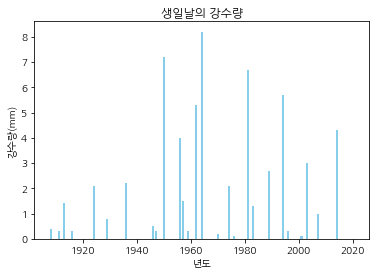

In [ ]:
# 초기 설정
import csv
import datetime as dt
import matplotlib.pyplot as plt
data = csv.reader(open('seoulrain.csv', encoding = 'cp949'))
next(data)
print('1907년부터 현재까지 당신의 생일날의 강수량 변화를 알아봅시다.')

# 리스트 생성
rain_x = []
rain_date = []
rain_y = []
rain_no = []

# 생일 입력
while True:
  bday = input('당신의 생일을 입력해주세요 [예: 07-05] : ')
  try:
    dt.datetime.strptime(bday, "%m-%d")
  except ValueError:
    print('00-00 형태로 다시 입력해주세요')
    continue
  else:
    break

# 리스트 구성
for row in data :
  if row[2] != '' :
    if '-' + bday in row[0] :                          # 생일 날짜만 골라서
      rain_x.append(int(row[0].split('-')[0]))         # 년도
      rain_date.append(row[0])                         # 연, 월, 일
      rain_y.append(float(row[2]))                     # 강수량 리스트 구성

# 가장 비나 눈이 많이 왔던 날과 그때의 강수량 출력
M = max(rain_y)
for i in range(len(rain_x)) :
  if rain_y[i] == M :
    d = dt.datetime.strptime(rain_date[i], '%Y-%m-%d')
print(f'\n당신의 생일 중 비나 눈이 가장 많이 왔던 날은 {d.year}년 {d.month}월 {d.day}일이고, 강수량은 {M}mm였습니다')

# 비나 눈이 오지 않은 해 출력
for i in range(len(rain_x)) :
  if rain_y[i] == 0 :
    rain_no.append(rain_x[i])
print(f'{rain_no}년 당신의 생일날엔 비가 오지 않았습니다')

# 강수량 그래프 출력
print('\n다음은 1907년부터 현재까지 당신의 생일날의 강수량 변화를 보여주는 그래프입니다')
plt.title('생일날의 강수량')
plt.xlabel('년도')
plt.ylabel('강수량(mm)')
plt.bar(rain_x, rain_y, color = 'skyblue')
plt.show()

## **3. 특정한 년도 생일날의 최고/최저기온과 강수량**
- 사용한 파일 https://drive.google.com/file/d/1tHsEXvUovxIf2EkzQAw-7lrlYyn8fMl7/view?usp=sharing

In [ ]:
# 초기 설정
import csv
import datetime as dt
import matplotlib.pyplot as plt
data = csv.reader(open('seoultemprain.csv', encoding = 'cp949'))
next(data)
print('1907년부터 현재까지 당신의 생일날 중 하루의 날씨를 알아봅시다.')

# 리스트 생성
year_range = []

# 생일 입력
while True:
  bday = input('당신의 생일을 입력해주세요 [예: 07-05] : ')
  try:
    dt.datetime.strptime(bday, "%m-%d")
  except ValueError:
    print('00-00 형태로 다시 입력해주세요')
    continue
  else:
    break

# 년도 입력
for i in range(1907,2023) :
  year_range.append(str(i))
byear = '12345'
while byear not in year_range :
  byear = input('몇년도의 생일날 날씨를 알아볼까요? [1907-2022] : ')
  if byear not in year_range :
    print('1907-2022 숫자의 사이를 입력해주세요')

# 기온과 강수량 출력
d = dt.datetime.strptime(bday, '%m-%d')
for row in data :
  if row[0] == f'{byear}-{bday}' :
    if row[-1] == '' or row[-2] == '' or row[-3] == '' :
      print('아쉽지만 해당년도는 데이터가 누락되었습니다')
    else : 
      print(f'{byear}년 {d.month}월 {d.day}일 최고기온은 {row[-2]}℃, 최저기온은 {row[-3]}℃, 강수량은 {row[-1]}mm 였습니다')

1907년부터 현재까지 당신의 생일날 중 하루의 날씨를 알아봅시다.
당신의 생일을 입력해주세요 [예: 07-05] : 12-31
몇년도의 생일날 날씨를 알아볼까요? [1907-2022] : 1907
1907년 12월 31일 최고기온은 -2.1℃, 최저기온은 -7.1℃, 강수량은 0.4mm 였습니다


- 날짜 입력 오류가 났을 때 처리하는 것이 궁금해서 질문방에 올렸다
- 범위를 벗어난 입력을 처리할 방법을 몰라서 질문했다
- 태기님이 답변을 달아주셨다. strptime은 알고 있었는데, try 랑 except 같은 걸 공부해야 써먹을 수 있을 것 같다

In [ ]:
# 원래 내 코드
bday = 'birthday'
while len(bday) !=5 or bday[2] != '-' :
  bday = input('당신의 생일을 입력해주세요. [예: 02-08] : ')
  if len(bday) !=5 or bday[2] != '-' :
    print('00-00 형태로 다시 입력해주세요')

# 수정된 코드
from datetime import datetime
while True:
  bday = input('당신의 생일을 입력해주세요 [예: 07-05] : ')
  try:
    datetime.strptime(bday, "%m-%d")
  except ValueError:
    print('00-00 형태로 다시 입력해주세요')
    continue
  else:
    break
print("잘 입력했습니다 {}".format(bday))

당신의 생일을 입력해주세요 [예: 07-05] : 12-22
잘 입력했습니다 12-22
